# Taller de Machine Learning (Aprendizaje Automático)
</br>

### Edgar Zamora Durán
### DevOps Lead – Master Inventor @IBM
</br>

## Ejemplo de regresion
</br>

### Noviembre 2019

0. Libraries to use:

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns 

%matplotlib inline

matplotlib.rcParams.update({'font.size': 12})

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

1. Load dataset

In [55]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(boston_df.shape)
boston_df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


3. Preprocesamiento de los datos

In [58]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

4. Análisis exploratorio de los datos

Distribución de la variable objetivo:

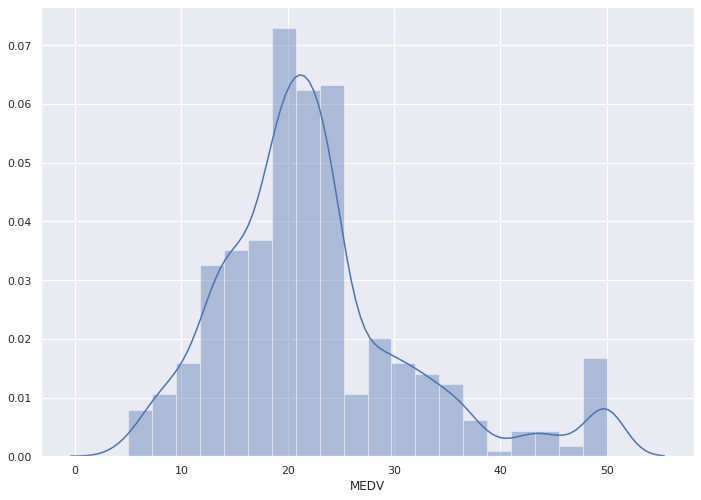

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_df['MEDV'], bins=20) #kde=False
plt.show()

Correlación de las variables:

Valores absolutos cercanas a 1 implica alta correlación.

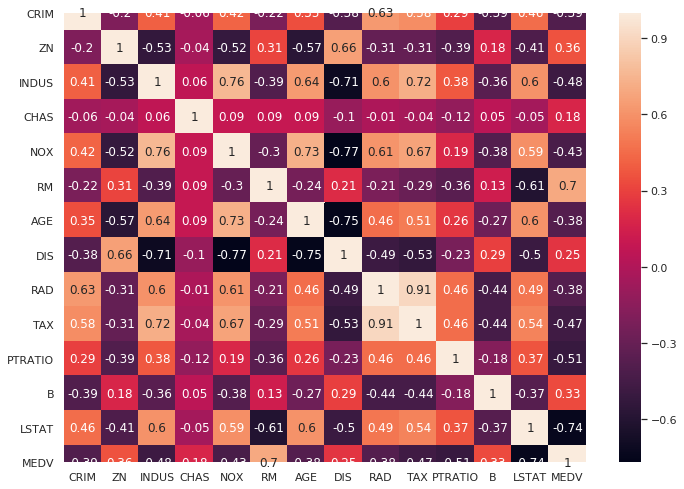

In [60]:
correlation_matrix = boston_df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

- RM y LSTAT tiene una alta correlacion con MEDV.
- RAD y TAX tienen una alta correlacion, podriamos descartar una de ellas. 

Detalle de la relacion entre RM y LSTAT con MEDV

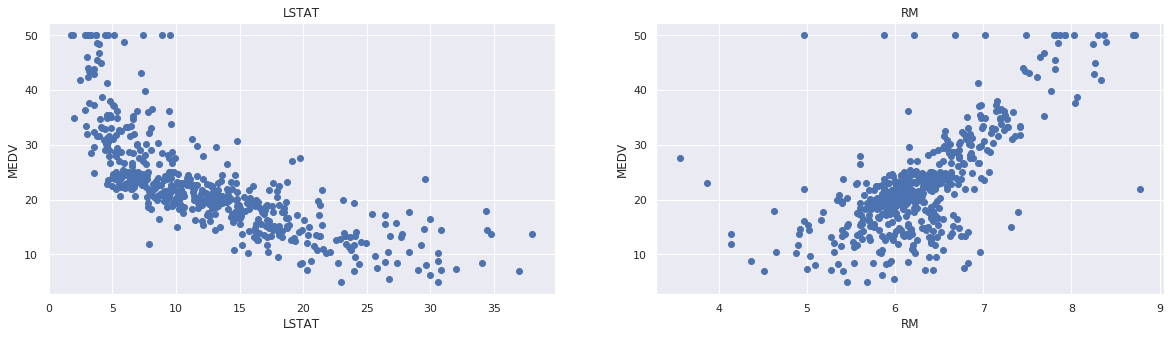

In [61]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### 5. Predicción

Separar la variable objetivo de las variables de predicción

In [0]:
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
#X = boston_df.drop('MEDV',axis=1)
Y = boston_df['MEDV']

Separar datos de entrenamiento (70%) y de pruebas (30%)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [73]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6. Evaluacion del modelo

In [65]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

prediction_vs_target_df = pd.DataFrame(np.c_[Y_train, y_train_predict], columns = ['target','prediction'])

print("Desempeño de las predicciones con el set de entrenamiento")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

prediction_vs_target_df.head(100)

Desempeño de las predicciones con el set de entrenamiento
--------------------------------------
RMSE is 5.291267334085863
R2 score is 0.6493177656003104




,target,prediction
0,11.8,15.777390
1,11.0,16.114650
2,23.7,27.895069
3,35.4,32.238794
4,15.2,14.825966
...,...,...
95,20.0,10.976762
96,20.1,20.488701
97,21.4,22.684212
98,17.4,18.780554


In [66]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Desempeño de las predicciones con el set de pruebas")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Desempeño de las predicciones con el set de pruebas
--------------------------------------
RMSE is 6.041044703455954
R2 score is 0.6162026947666575


## Qué pasa si usamos otro modelo lineal?

In [0]:
alpha = 0.0001

lin_model = <Usar Ridge o Lasso acá, probar con differentes alpha>
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

prediction_vs_target_df = pd.DataFrame(np.c_[Y_train, y_train_predict], columns = ['target','prediction'])

print("Desempeño de las predicciones con el set de entrenamiento")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

prediction_vs_target_df.head(100)

In [72]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Desempeño de las predicciones con el set de pruebas")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Desempeño de las predicciones con el set de pruebas
--------------------------------------
RMSE is 6.042975251213483
R2 score is 0.6159573539506349
